# Five Minute Forest

### Fit the iris data

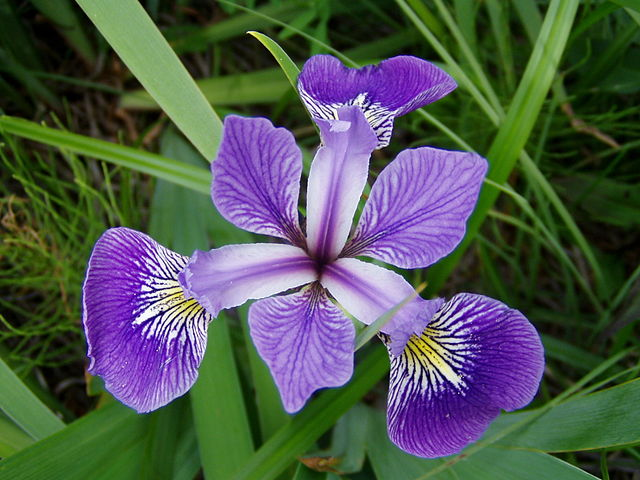

#### A. Get the data
1. From the `sklearn.datasets` module import the `load_iris` method
2. Load in the iris data with `iris = load_iris()`

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

#### B. Fit the Random Forest
3. From the `sklearn.ensemble` module import the `RandomForestClassifier` class constructor
4. Initialize and instance of the random forest class with `rfc = RandomForestClassifier( n_estimators = 100 )`
5. Fit the data: `rfc.fit(iris.data, iris.target)`
6. Look at the accuracy: `rfc.score(iris.data, iris.target)`

In [3]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier( n_estimators = 100, random_state = 415 )
rfc.fit(iris.data,iris.target)
rfc.score(iris.data,iris.target)

1.0

#### C. Discuss (Optional typing)
7. Import `pandas` under the common alias `pd`
8. Set `X` as the iris data using `X = pd.DataFrame( iris.data, columns = iris.feature_names)`
9. Set `y` as the iris target using `y = pd.DataFrame( iris.target, columns = ['iris_num_type'] )`
10. Append a column with the actual iris names with
`y['iris_type'] = y.iris_num_type.map(dict(enumerate(iris.target_names)))`
11. Look at samples of `X` and `y`

In [4]:
# import pandas
import pandas as pd
# Define X
X = pd.DataFrame( iris.data, columns = iris.feature_names )
# Define y
y = pd.DataFrame( iris.target, columns = ['iris_num_type'] )
# Add another column to y with names
y['iris_type'] = y.iris_num_type.map( dict(enumerate(iris.target_names)) ) #optional

In [5]:
X.sample(5, random_state = 415 ).sort_index()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
38,4.4,3.0,1.3,0.2
79,5.7,2.6,3.5,1.0
121,5.6,2.8,4.9,2.0
126,6.2,2.8,4.8,1.8
142,5.8,2.7,5.1,1.9


In [6]:
y.sample(5, random_state = 415).sort_index()

,iris_num_type,iris_type
38,0,setosa
79,1,versicolor
121,2,virginica
126,2,virginica
142,2,virginica


#### D. Predict something
12. Create a new sample `samp = [6.0, 3.0, 5.0, 2.5]` and predict which type it is.

In [7]:
samp = [6.0, 3.0, 5.0, 2.5]
rfc.predict( [samp] )

array([2])

## A (decision) tree in the forest

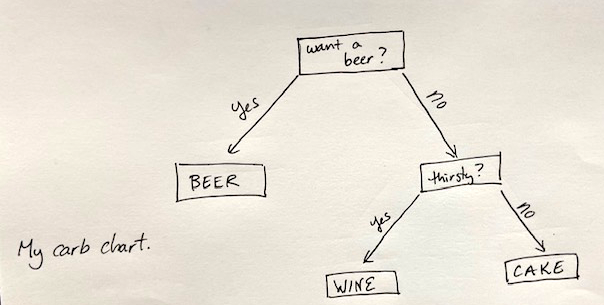

- Decision trees are "yes/no flowcharts" where given a sample, the sample moves down the branches following the "yes" direction. Finally the sample reaches a leaf (a terminal node) which is associated with a specific target class/value; this is how the decision tree predicts the target class/value of that sample.

- A random forest is made of many trees, and each tree gets a "vote" in the final outcome

In [8]:
# Each decision tree is an "estimator" in the forest
## we can access through estimators_ attribute
trees = rfc.estimators_

In [9]:
# Look at the first one
trees[0]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=270514505, splitter='best')

In [10]:
# Look at the distribution of votes
pd.Series(trees).apply(lambda tree: tree.predict([samp])[0]).value_counts()

2.0    98
1.0     2
dtype: int64

In [11]:
# We also could have gotten this information from predict_proba
rfc.predict_proba([samp])

array([[0.  , 0.02, 0.98]])

### A decision tree with only two features (Sepal Length and Petal Length)

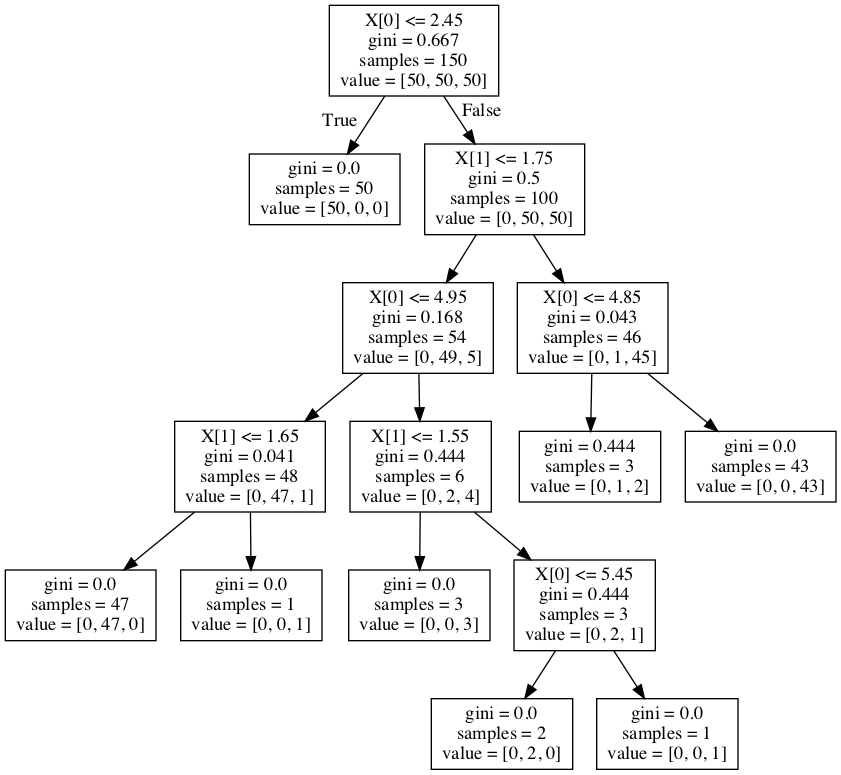

## A more interesting/appropriate RF example: MNIST

Here it will be easier for us to discuss why random forests are "random"...!

In [12]:
# Read in the "training data"
Xtrain = pd.read_csv('data/Xtrain.csv', header = None ).values
# Read in the "training target"
ytrain = pd.read_csv('data/ytrain.csv', header = None ).values.ravel()

In [13]:
# Examine the data
print(Xtrain.shape)
Xtrain[:3]

(45000, 784)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
# Examine the target
ytrain[:3]

array([7, 4, 9])

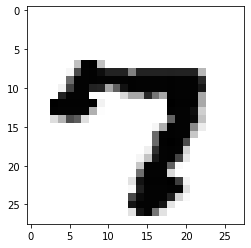

In [15]:
import matplotlib.pyplot as plt
plt.imshow( Xtrain[0].reshape((28,28)), cmap = 'Greys' )

In [16]:
rfc2 = RandomForestClassifier(n_estimators = 100, random_state = 415)
rfc2.fit( Xtrain, ytrain )

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=415,
                       verbose=0, warm_start=False)

In [17]:
rfc2.score(Xtrain,ytrain)

1.0

In [18]:
Xtest = pd.read_csv('data/Xtest.csv', header = None).values
ytest = pd.read_csv('data/ytest.csv', header = None).values.ravel()

In [19]:
rfc2.score(Xtest,ytest)

0.9658

#### Let's look at some of the mistakes

In [20]:
ypred = rfc2.predict(Xtest)
wrongs = (ypred != ytest )

In [21]:
len(ypred)

10000

In [22]:
sum(wrongs)

342

In [23]:
wrong_imgs = Xtest[wrongs]

8


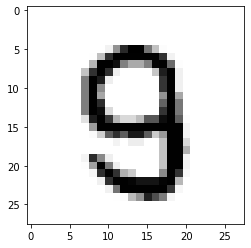

In [24]:
print(ypred[wrongs][5])
plt.imshow( Xtest[wrongs][5].reshape((28,28)), cmap = 'Greys' )

### A peak at boostrapping...

In [25]:
from sklearn.utils import resample
orig_dist = [1,1,1,2,2,3,3,3,3]
bootstraps = [resample(orig_dist) for i in range(10)]

In [26]:
orig_dist

[1, 1, 1, 2, 2, 3, 3, 3, 3]

In [27]:
bootstraps

[[3, 2, 1, 3, 3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3, 1, 2, 3, 1],
 [3, 3, 3, 3, 3, 2, 3, 1, 3],
 [1, 1, 1, 1, 3, 3, 3, 3, 3],
 [2, 3, 1, 1, 3, 1, 2, 2, 3],
 [2, 3, 1, 3, 3, 3, 1, 3, 2],
 [2, 1, 1, 1, 3, 2, 3, 2, 3],
 [3, 1, 3, 3, 2, 3, 3, 1, 1],
 [1, 2, 3, 3, 1, 3, 2, 3, 2],
 [3, 1, 2, 2, 3, 3, 1, 1, 1]]